In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# ✅ Install required libraries
!pip install --upgrade tensorflow tensorflow-io

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 31.3 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.19.0
    Uninstalling tensorflow-2.19.0:
      Successfully uninstalled tensorflow-2.19.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-text 2.19.0 requires tensorflow<2.20,>=2.19.0, but yo

In [3]:
# ✅ General Imports
import tensorflow as tf
import pandas as pd
import numpy as np
import random
import os

# ✅ Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Building Model
from keras.utils import plot_model
from tensorflow.keras import models
from tensorflow.keras.layers import BatchNormalization, MaxPooling2D, Conv2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers.legacy import Adam   # safer for TF versions in Colab

# ✅ Training Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# ✅ Data Processing
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img

In [4]:
# ✅ Global variables
SAVE = False
SEED = 111

# Setting seed for consistent results
tf.keras.utils.set_random_seed(SEED)
tf.random.set_seed(SEED)
np.random.seed(SEED)

# ✅ Data Visualization updates
plt.rcParams["figure.figsize"] = (16, 10)
plt.rcParams.update({'font.size': 14})

# ✅ Data Classifications
CLASS_TYPES = ['pituitary', 'notumor', 'meningioma', 'glioma']
N_TYPES = len(CLASS_TYPES)

In [5]:
USER_PATH = r"/content/drive/MyDrive/brain-tumor-mri-dataset"
train_dir =  r"/content/drive/MyDrive/brain_tumor_dataset/Training"
test_dir = r"/content/drive/MyDrive/brain_tumor_dataset/Testing"

# ✅ Function for importing data
def get_data_labels(directory, shuffle=True, random_state=0):
    """
    Function to traverse dataset directory and get file paths + labels
    """
    from sklearn.utils import shuffle
    data_path, data_labels = [], []

    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if not os.path.isdir(label_dir):
            continue
        for image in os.listdir(label_dir):
            image_path = os.path.join(label_dir, image)
            data_path.append(image_path)
            data_labels.append(label)

    if shuffle:
        data_path, data_labels = shuffle(data_path, data_labels, random_state=random_state)

    return data_path, data_labels

# ✅ Get training and testing data
train_paths, train_labels = get_data_labels(train_dir)
test_paths, test_labels = get_data_labels(test_dir)

# ✅ Print dataset info
print('Training')
print(f'Number of Paths: {len(train_paths)}')
print(f'Number of Labels: {len(train_labels)}')
print('\nTesting')
print(f'Number of Paths: {len(test_paths)}')
print(f'Number of Labels: {len(test_labels)}')


Training
Number of Paths: 5712
Number of Labels: 5712

Testing
Number of Paths: 1311
Number of Labels: 1311


Training Counts
{'pituitary': 1457, 'notumor': 1595, 'meningioma': 1339, 'glioma': 1321}

Testing Counts
{'pituitary': 300, 'notumor': 405, 'meningioma': 306, 'glioma': 300}


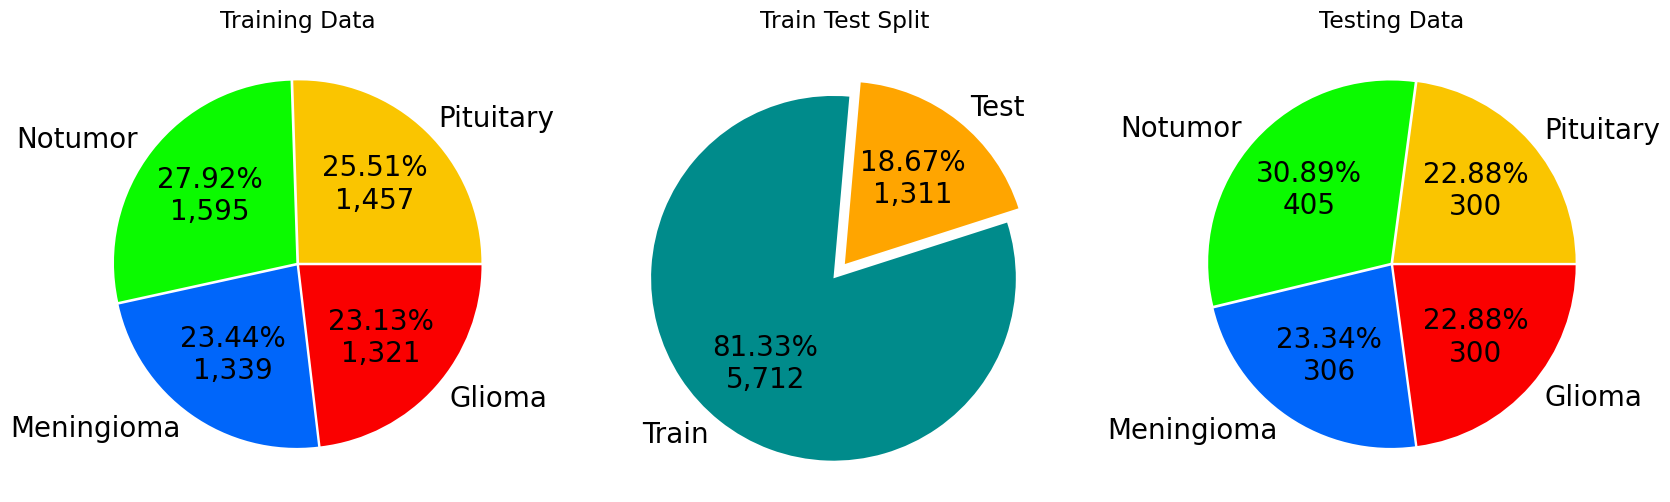

In [6]:
# ✅ Plot distributions
_, ax = plt.subplots(ncols=3, figsize=(20, 14))

# Training data distribution
class_counts = [len([x for x in train_labels if x == label]) for label in CLASS_TYPES]
print('Training Counts')
print(dict(zip(CLASS_TYPES, class_counts)))

ax[0].set_title('Training Data')
ax[0].pie(
    class_counts,
    labels=[label.title() for label in CLASS_TYPES],
    colors=['#FAC500','#0BFA00', '#0066FA','#FA0000'],
    autopct=lambda p: '{:.2f}%\n{:,.0f}'.format(p, p * sum(class_counts) / 100),
    explode=tuple(0.01 for i in range(N_TYPES)),
    textprops={'fontsize': 20}
)

# Train/Test Split
ax[1].set_title('Train Test Split')
ax[1].pie(
    [len(train_labels), len(test_labels)],
    labels=['Train','Test'],
    colors=['darkcyan', 'orange'],
    autopct=lambda p: '{:.2f}%\n{:,.0f}'.format(p, p * sum([len(train_labels), len(test_labels)]) / 100),
    explode=(0.1, 0),
    startangle=85,
    textprops={'fontsize': 20}
)

# Testing data distribution
class_counts = [len([x for x in test_labels if x == label]) for label in CLASS_TYPES]
print('\nTesting Counts')
print(dict(zip(CLASS_TYPES, class_counts)))

ax[2].set_title('Testing Data')
ax[2].pie(
    class_counts,
    labels=[label.title() for label in CLASS_TYPES],
    colors=['#FAC500', '#0BFA00', '#0066FA', '#FA0000'],
    autopct=lambda p: '{:.2f}%\n{:,.0f}'.format(p, p * sum(class_counts) / 100),
    explode=tuple(0.01 for i in range(N_TYPES)),
    textprops={'fontsize': 20}
)

plt.show()

x reshaped: (1, 150, 150, 3)


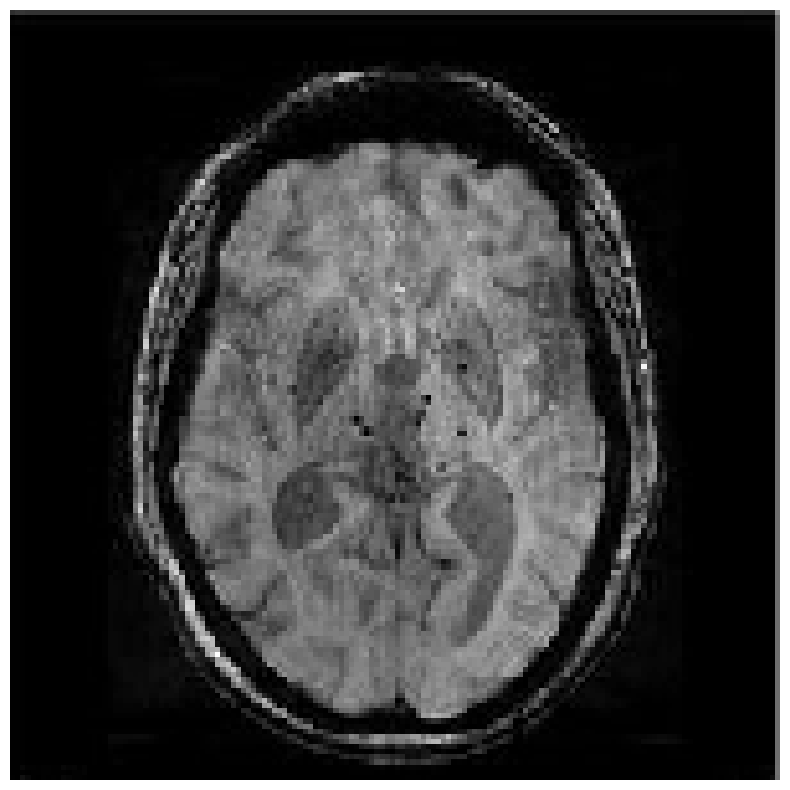

In [7]:
# ✅ Get one image to test
im = load_img(train_paths[3], target_size=(150, 150))
im = img_to_array(im)

# Reshape it to (1, 150, 150, 3)
im = np.expand_dims(im, axis=0)
print(f'x reshaped: {im.shape}')

# Normalize
im = im / np.max(im)

# Convert the array back to image for display
im_disp = array_to_img(im[0])
plt.imshow(im_disp)
plt.axis("off")
plt.show()

In [8]:
# ✅ Function to display multiple images
def show_images(paths, label_paths, index_list=range(10), im_size=250, figsize=(12, 8), save=False):
    num_images = len(index_list)
    num_rows = (num_images + 3) // 4

    _, ax = plt.subplots(nrows=num_rows, ncols=4, figsize=figsize)
    ax = ax.flatten()

    for i, index in enumerate(index_list):
        if i >= num_images:
            break
        image = load_img(paths[index], target_size=(im_size, im_size))
        ax[i].imshow(image)
        ax[i].set_title(f'{index}: {label_paths[index]}')
        ax[i].axis('off')

    # Hide any extra subplots
    for j in range(i+1, len(ax)):
        ax[j].axis("off")

    plt.tight_layout()
    if save:
        plt.savefig('show_image.pdf')
    else:
        plt.show()


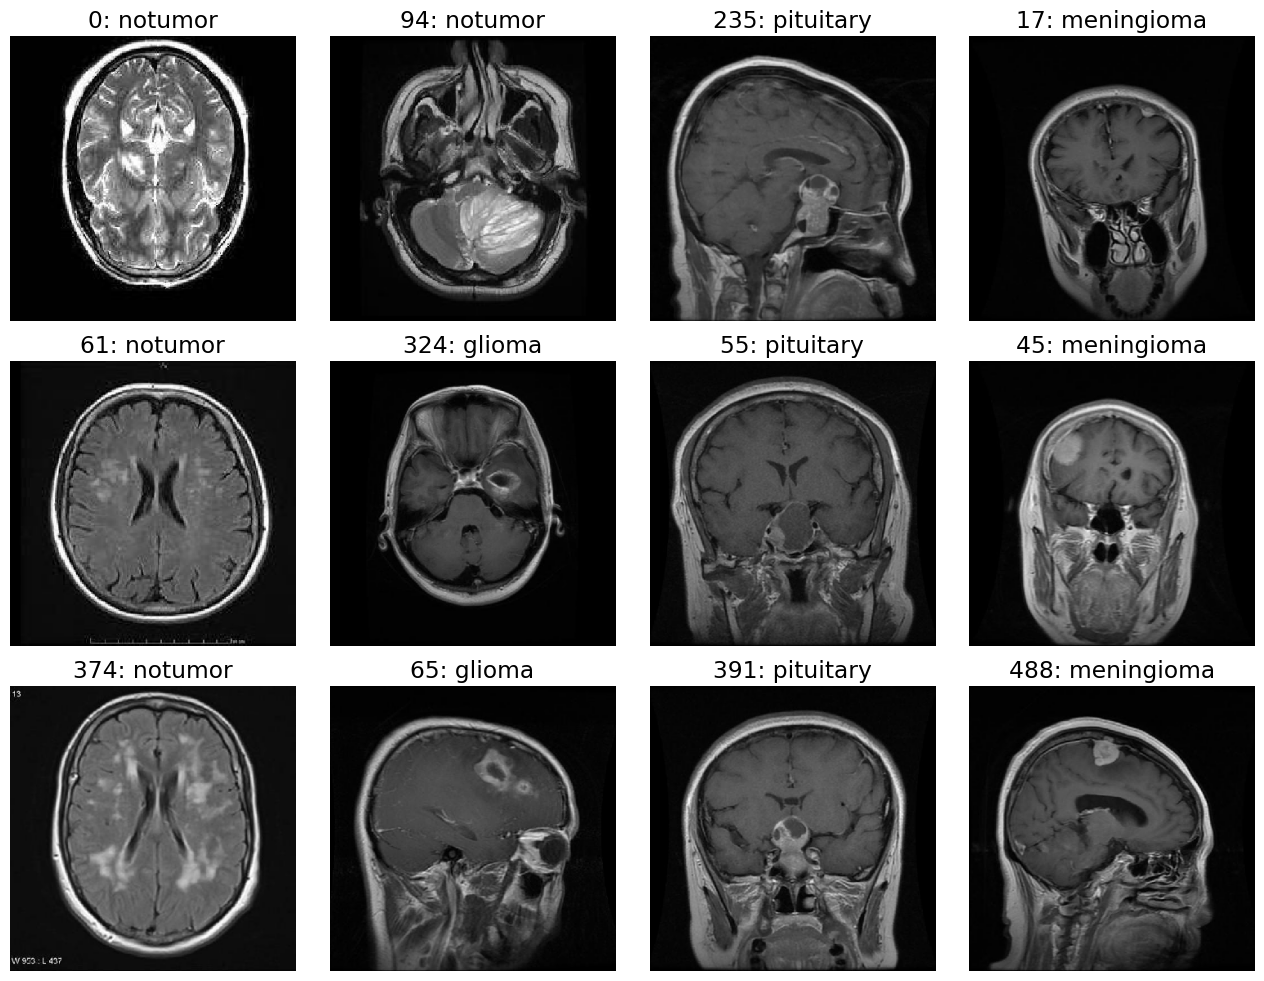

In [9]:
# ✅ Show sample training images
show_images(
    train_paths, train_labels,
    im_size=350, figsize=(13,10),
    index_list=[0, 94, 235, 17, 61, 324, 55, 45, 374, 65, 391, 488]
)

In [10]:
# Image size
image_size = (150, 150)

# Training batch size
batch_size = 32

# ✅ Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    brightness_range=(0.85, 1.15),
    width_shift_range=0.002,
    height_shift_range=0.002,
    shear_range=12.5,
    zoom_range=0,     # keep 0 if you don't want zoom, or set 0.1 for slight zoom
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode="nearest"
)

# Training generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    seed=SEED
)

# ✅ Test data (no augmentation, only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False,
    seed=SEED
)


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [15]:
# ✅ Class indices
class_indices_train = train_generator.class_indices
class_indices_train_list = list(train_generator.class_indices.keys())

print("Categorical types for the training data:")
print(class_indices_train)

def show_ImageDataGenerator(generator, num_samples=5, figsize=(12, 12), save=False):
    """
    Function to visualize how the ImageDataGenerator augments the data
    """
    # Generate augmented samples
    augmented_samples = next(generator)

    # Extract images from the batch
    images = augmented_samples[0][:num_samples]

    # Display the augmented images
    fig, axes = plt.subplots(1, num_samples, figsize=figsize)

    for i, ax in enumerate(axes):
        ax.imshow(images[i])
        ax.axis('off')

    plt.tight_layout()

    if save:
        plt.savefig('show_ImageDataGenerator.pdf')

    plt.show()


Categorical types for the training data:
{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


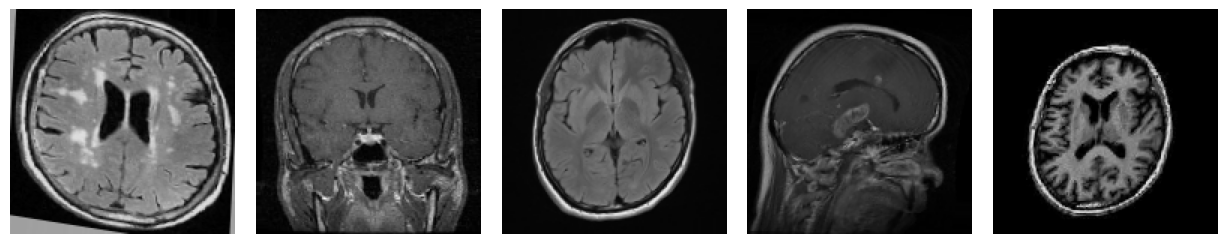

Image shape: (150, 150, 3)
Epochs: 40
Batch size: 32
Steps Per Epoch: 178
Validation steps: 40


In [16]:
# Show augmented samples
show_ImageDataGenerator(train_generator, num_samples=5, figsize=(12.5, 8), save=SAVE)

# ✅ Model training parameters
image_shape = (image_size[0], image_size[1], 3)
epochs = 40
steps_per_epoch = train_generator.samples // batch_size
validation_steps = test_generator.samples // batch_size

print(f'Image shape: {image_shape}')
print(f'Epochs: {epochs}')
print(f'Batch size: {batch_size}')
print(f'Steps Per Epoch: {steps_per_epoch}')
print(f'Validation steps: {validation_steps}')

In [17]:
# –––––––––––––––––––––––––––––––––––––– #
# Output Images and Labels Visualization #
# –––––––––––––––––––––––––––––––––––––– #
def plot_sample_predictions(model, test_generator, categories, num_samples=9, figsize=(12, 8)):
    """
    Display sample predictions with true vs predicted labels.
    """
    predictions = model.predict(test_generator)
    predicted_categories = np.argmax(predictions, axis=1)
    true_categories = test_generator.classes

    # Randomly sample test images
    test_images = np.array(test_generator.filepaths)
    sample_indices = np.random.choice(len(test_images), size=num_samples, replace=False)
    sample_images = test_images[sample_indices]
    sample_predictions = [categories[predicted_categories[idx]] for idx in sample_indices]
    sample_true_labels = [categories[true_categories[idx]] for idx in sample_indices]

    # Plot sample images
    plt.figure(figsize=figsize)
    for i, image_path in enumerate(sample_images):
        plt.subplot(3, 3, i + 1)
        img = plt.imread(image_path)
        plt.imshow(img)
        plt.axis("off")

        # Green = correct, Red = wrong
        color = 'green' if sample_predictions[i] == sample_true_labels[i] else 'red'
        plt.title(f"Pred: {sample_predictions[i]}\nTrue: {sample_true_labels[i]}", color=color)

    plt.tight_layout()
    plt.show()


# –––––––––––––––––––––––––––––––––––––– #
#            Confusion matrix            #
# –––––––––––––––––––––––––––––––––––––– #
def CM(CNN_model, test_generator, categories, plot=True):
    """
    Function to return and optionally plot confusion matrix.
    """
    from sklearn.metrics import confusion_matrix
    predictions = CNN_model.predict(test_generator)
    predicted_categories = np.argmax(predictions, axis=1)
    true_categories = test_generator.classes

    cm = confusion_matrix(true_categories, predicted_categories)

    if plot:
        import seaborn as sns
        plt.figure(figsize=(8,6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                    xticklabels=categories, yticklabels=categories)
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.title("Confusion Matrix")
        plt.show()

    return cm


# –––––––––––––––––––––––––––––––––––––– #
#             Metric Analysis            #
# –––––––––––––––––––––––––––––––––––––– #
def calculate_metrics(confusion_matrix, categories):
    """
    Calculate precision, recall, F1-score, accuracy for each class.
    """
    precision = np.divide(np.diag(confusion_matrix), np.sum(confusion_matrix, axis=0),
                          out=np.zeros_like(np.diag(confusion_matrix), dtype=float),
                          where=np.sum(confusion_matrix, axis=0)!=0)

    recall = np.divide(np.diag(confusion_matrix), np.sum(confusion_matrix, axis=1),
                       out=np.zeros_like(np.diag(confusion_matrix), dtype=float),
                       where=np.sum(confusion_matrix, axis=1)!=0)

    f1_score = np.divide(2 * (precision * recall), (precision + recall),
                         out=np.zeros_like(precision),
                         where=(precision + recall)!=0)

    accuracy = np.sum(np.diag(confusion_matrix)) / np.sum(confusion_matrix)

    for i, category in enumerate(categories):
        print(f"Class: {category.title()}")
        print(f"Precision: {precision[i]:.3f}")
        print(f"Recall: {recall[i]:.3f}")
        print(f"F1-Score: {f1_score[i]:.3f}\n")

    print(f"\nOverall Accuracy: {accuracy:.3f}")


In [18]:
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the model architecture
model = models.Sequential([
    Conv2D(32, (4, 4), activation="relu", input_shape=image_shape),
    MaxPooling2D(pool_size=(3, 3)),

    Conv2D(64, (4, 4), activation="relu"),
    MaxPooling2D(pool_size=(3, 3)),

    Conv2D(128, (4, 4), activation="relu"),
    MaxPooling2D(pool_size=(3, 3)),

    Conv2D(128, (4, 4), activation="relu"),
    Flatten(),

    Dense(512, activation="relu"),
    Dropout(0.5),
    Dense(N_TYPES, activation="softmax")
])

model.summary()

optimizer = Adam(learning_rate=0.001, beta_1=0.869, beta_2=0.995)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 147, 147, 32)   │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 46, 46, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 1, 1, 128)      │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 495,972 (1.89 MB)

 Trainable params: 495,972 (1.89 MB)

 Non-trainable params: 0 (0.00 B)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.3 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


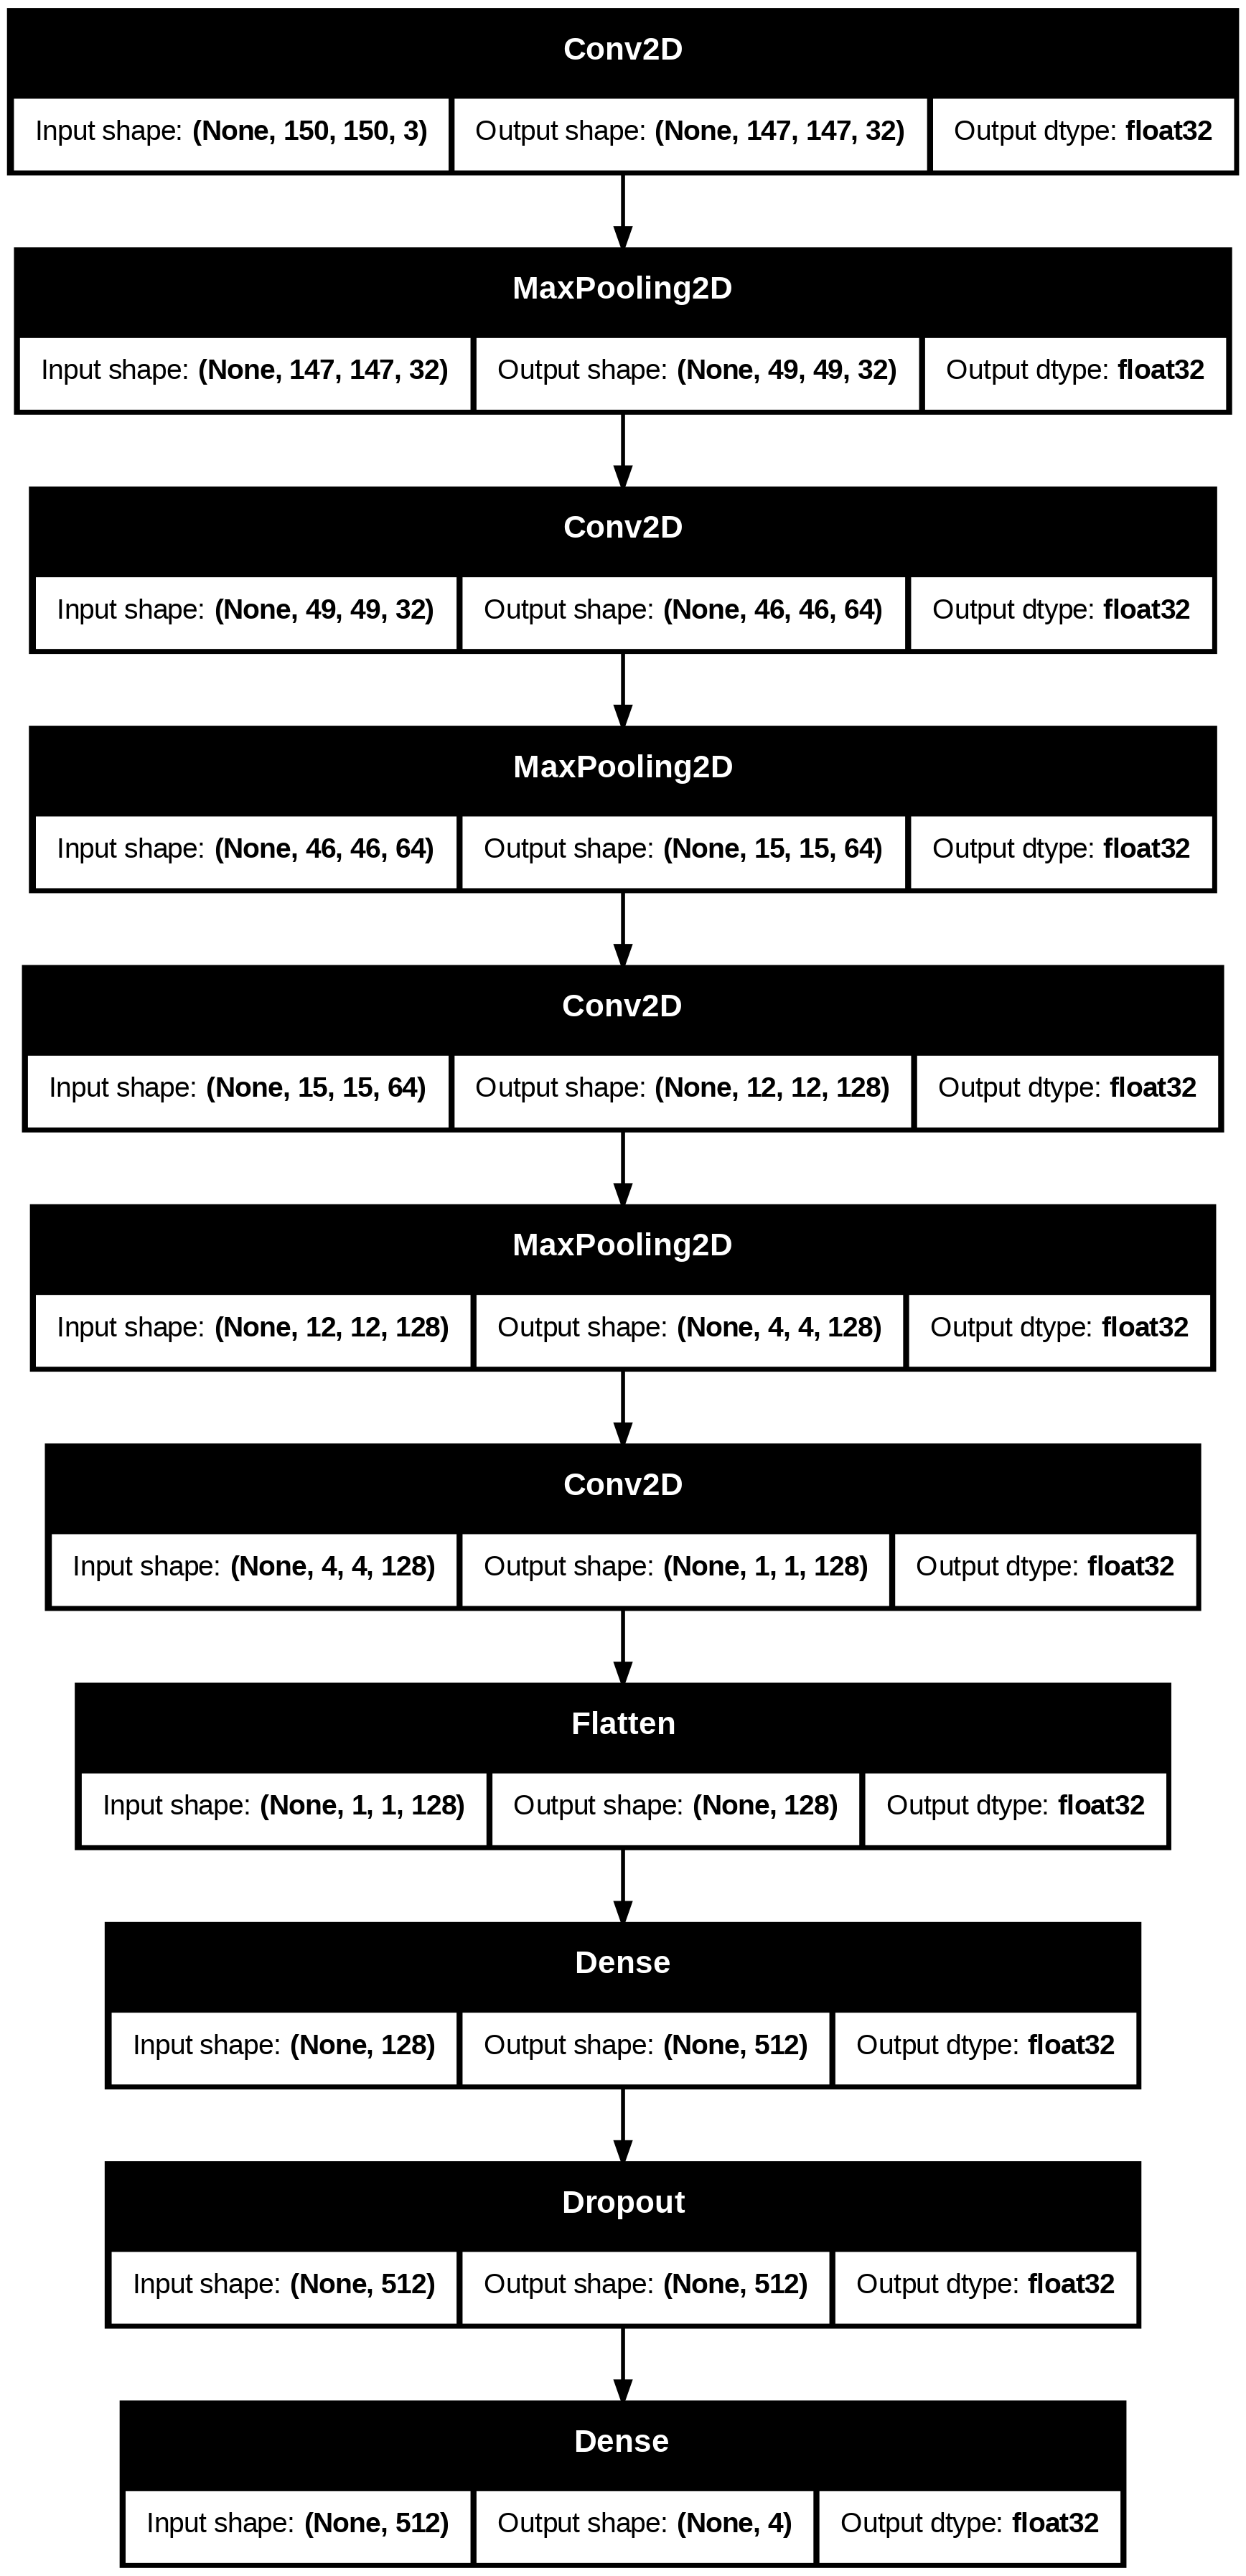

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
178/178 ━━━━━━━━━━━━━━━━━━━━ 2331s 13s/step - accuracy: 0.4815 - loss: 1.0908 - val_accuracy: 0.7172 - val_loss: 0.6863 - learning_rate: 0.0010
Epoch 2/40
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:43 921ms/step - accuracy: 0.7812 - loss: 0.6066

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


178/178 ━━━━━━━━━━━━━━━━━━━━ 25s 134ms/step - accuracy: 0.7812 - loss: 0.6066 - val_accuracy: 0.7383 - val_loss: 0.6528 - learning_rate: 0.0010
Epoch 3/40
178/178 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - accuracy: 0.7778 - loss: 0.5341 - val_accuracy: 0.7539 - val_loss: 0.6183 - learning_rate: 0.0010
Epoch 4/40
178/178 ━━━━━━━━━━━━━━━━━━━━ 20s 111ms/step - accuracy: 0.7500 - loss: 0.4446 - val_accuracy: 0.7484 - val_loss: 0.6038 - learning_rate: 0.0010
Epoch 5/40
178/178 ━━━━━━━━━━━━━━━━━━━━ 322s 2s/step - accuracy: 0.8217 - loss: 0.4435 - val_accuracy: 0.7945 - val_loss: 0.5225 - learning_rate: 0.0010
Epoch 6/40
178/178 ━━━━━━━━━━━━━━━━━━━━ 14s 78ms/step - accuracy: 0.8125 - loss: 0.5376 - val_accuracy: 0.8125 - val_loss: 0.4509 - learning_rate: 0.0010
Epoch 7/40
178/178 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - accuracy: 0.8696 - loss: 0.3437 - val_accuracy: 0.8164 - val_loss: 0.5218 - learning_rate: 0.0010
Epoch 8/40
178/178 ━━━━━━━━━━━━━━━━━━━━ 15s 78ms/step - accuracy: 0.7188 - loss: 0.7054 

In [19]:
# Visualize the model
!pip install visualkeras
import visualkeras
from visualkeras import layered_view
from tensorflow.keras.utils import plot_model
from IPython.display import Image, display
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Visual keras visualization
layered_view(model, legend=True, max_xy=300)

# Save model architecture to a file
plot_model(model, show_dtype=True, to_file='model_architecture.png', show_shapes=True)

# Display model architecture in notebook
display(Image(filename='model_architecture.png', retina=True))

# Callbacks
model_es = EarlyStopping(monitor='loss', min_delta=1e-9, patience=8, verbose=True)
model_rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, verbose=True)

# Training
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=validation_steps,
    callbacks=[model_es, model_rlr]
)

# Evaluation
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Test Loss: {loss:0.5f}")
print(f"Test Accuracy: {accuracy:0.5f}")


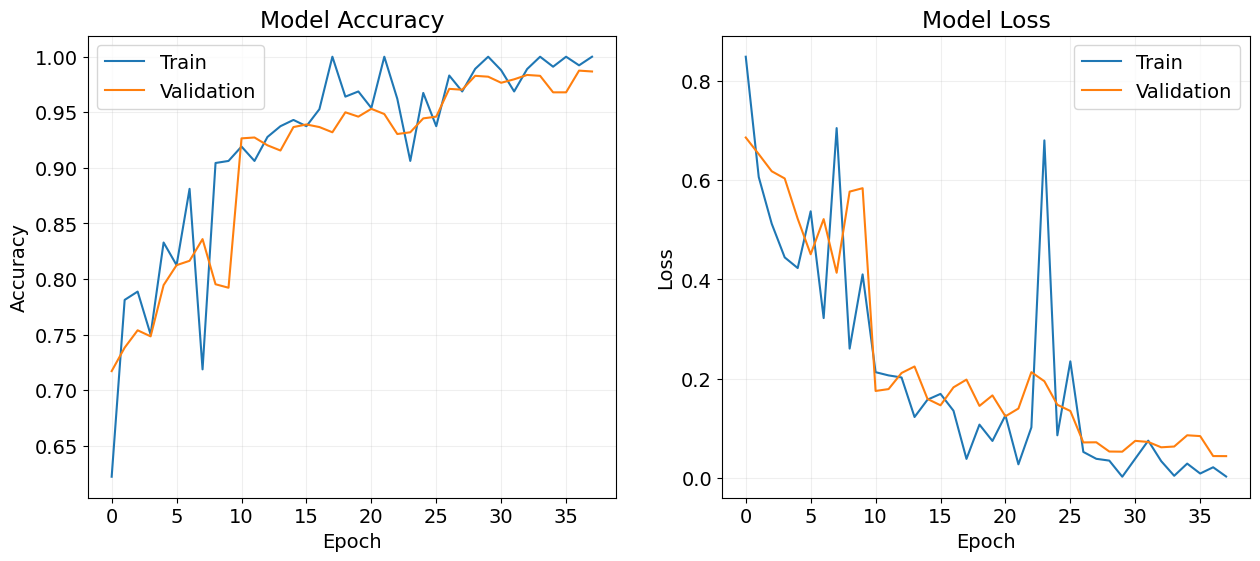

In [20]:
import seaborn as sns
from IPython.display import display

# Accuracy/Loss plots
_, ax = plt.subplots(ncols=2, figsize=(15, 6))

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train', 'Validation'])
ax[0].grid(alpha=0.2)

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train', 'Validation'])
ax[1].grid(alpha=0.2)

plt.show()

41/41 ━━━━━━━━━━━━━━━━━━━━ 14s 337ms/step


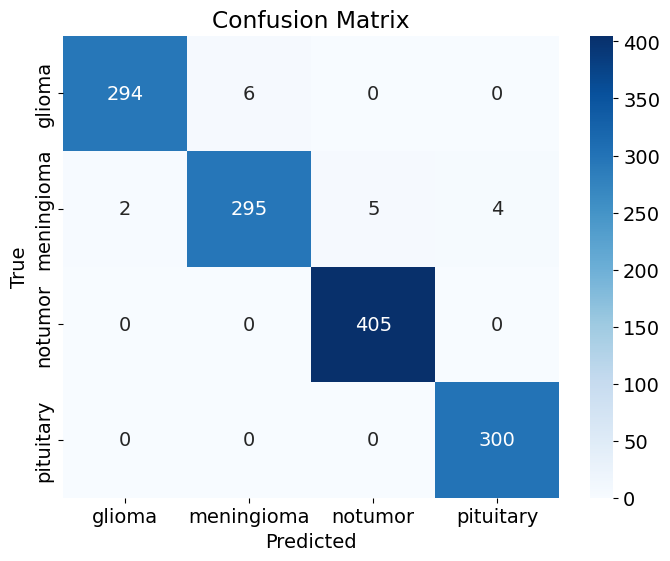

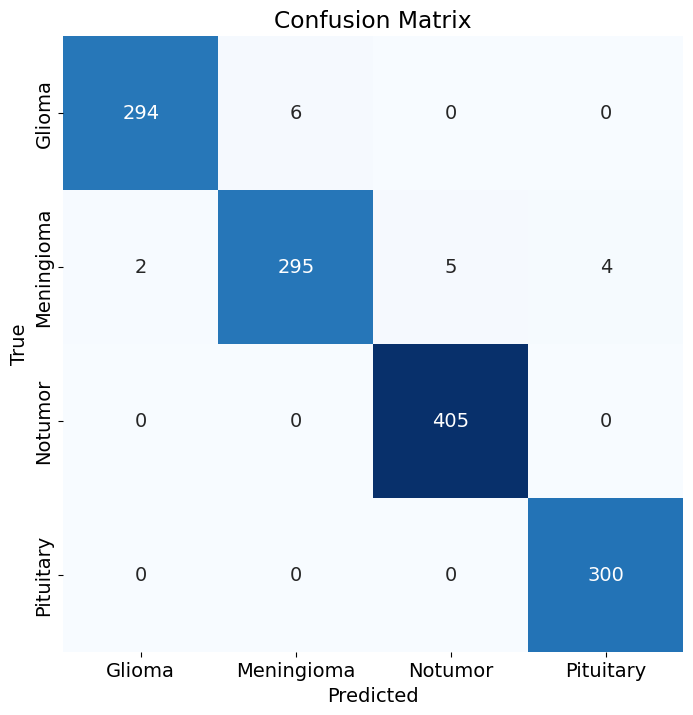

Class: Glioma
Precision: 0.993
Recall: 0.980
F1-Score: 0.987

Class: Meningioma
Precision: 0.980
Recall: 0.964
F1-Score: 0.972

Class: Notumor
Precision: 0.988
Recall: 1.000
F1-Score: 0.994

Class: Pituitary
Precision: 0.987
Recall: 1.000
F1-Score: 0.993


Overall Accuracy: 0.987


TypeError: plot_sample_predictions() got an unexpected keyword argument 'test_dir'

In [23]:
# Confusion Matrix
confusion_matrix = CM(CNN_model=model, test_generator=test_generator, categories=class_indices_train_list)

plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(ticks=np.arange(N_TYPES) + 0.5,
           labels=[name.title() for name in class_indices_train_list], ha='center')
plt.yticks(ticks=np.arange(N_TYPES) + 0.5,
           labels=[name.title() for name in class_indices_train_list], va='center')
plt.show()

# Metrics
calculate_metrics(confusion_matrix, categories=class_indices_train_list)

# Predictions
plot_sample_predictions(model=model,
                        test_generator=test_generator,
                        categories=class_indices_train_list,
                        test_dir=test_dir,
                        num_samples=9,
                        figsize=(13, 12))

# Channel activation maps
batch_images, batch_labels = next(test_generator)
image, label = batch_images[0], batch_labels[0]
image_tensor = np.expand_dims(image, axis=0)

class_indices = test_generator.class_indices
label_name = [k for k, v in class_indices.items() if np.argmax(label) == v][0]

print(f"Class name of the first image: {label_name}")
print(f"Shape {image_tensor.shape}")

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import array_to_img

def plot_sample_predictions(model, test_generator, categories, num_samples=9, figsize=(12, 12)):
    """
    Show random predictions from the test set with true vs predicted labels.

    Parameters:
        model (tensorflow.keras.models.Model): Trained Keras model.
        test_generator (DirectoryIterator): Keras test data generator.
        categories (list): List of class names.
        num_samples (int): Number of samples to display.
        figsize (tuple): Size of the figure.

    Returns:
        None
    """
    # Reset generator so we get fresh samples each time
    test_generator.reset()

    # Get one batch
    batch_images, batch_labels = next(test_generator)
    predictions = model.predict(batch_images, verbose=False)

    # Pick random indices
    idxs = np.random.choice(len(batch_images), size=num_samples, replace=False)

    plt.figure(figsize=figsize)
    for i, idx in enumerate(idxs):
        image = batch_images[idx]
        true_label = categories[np.argmax(batch_labels[idx])]
        pred_label = categories[np.argmax(predictions[idx])]

        plt.subplot(int(np.ceil(num_samples/3)), 3, i+1)
        plt.imshow(array_to_img(image))
        plt.title(f"True: {true_label}\nPred: {pred_label}",
                  color="green" if true_label == pred_label else "red")
        plt.axis("off")

    plt.tight_layout()
    plt.show()


41/41 ━━━━━━━━━━━━━━━━━━━━ 14s 345ms/step


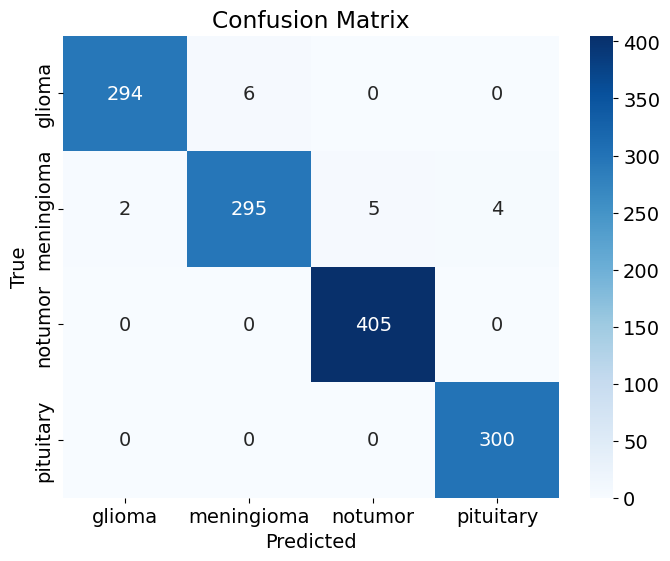

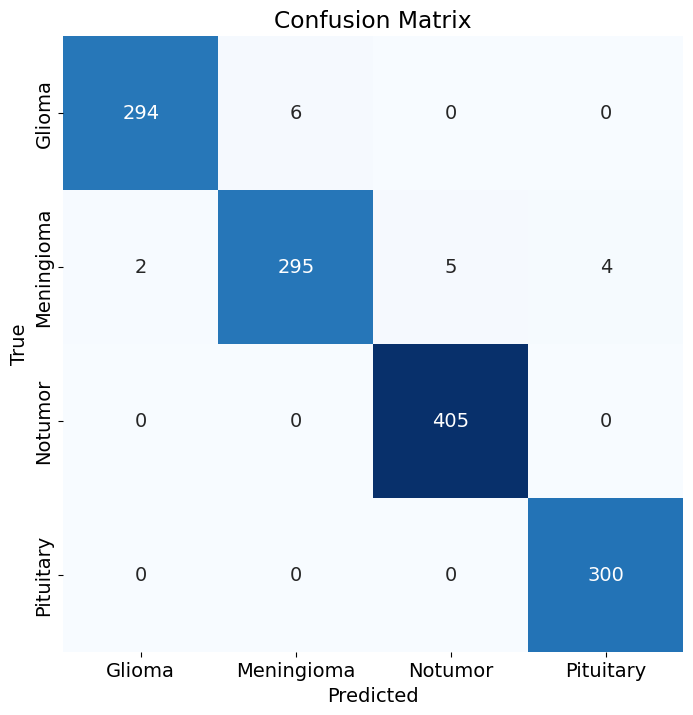

Class: Glioma
Precision: 0.993
Recall: 0.980
F1-Score: 0.987

Class: Meningioma
Precision: 0.980
Recall: 0.964
F1-Score: 0.972

Class: Notumor
Precision: 0.988
Recall: 1.000
F1-Score: 0.994

Class: Pituitary
Precision: 0.987
Recall: 1.000
F1-Score: 0.993


Overall Accuracy: 0.987


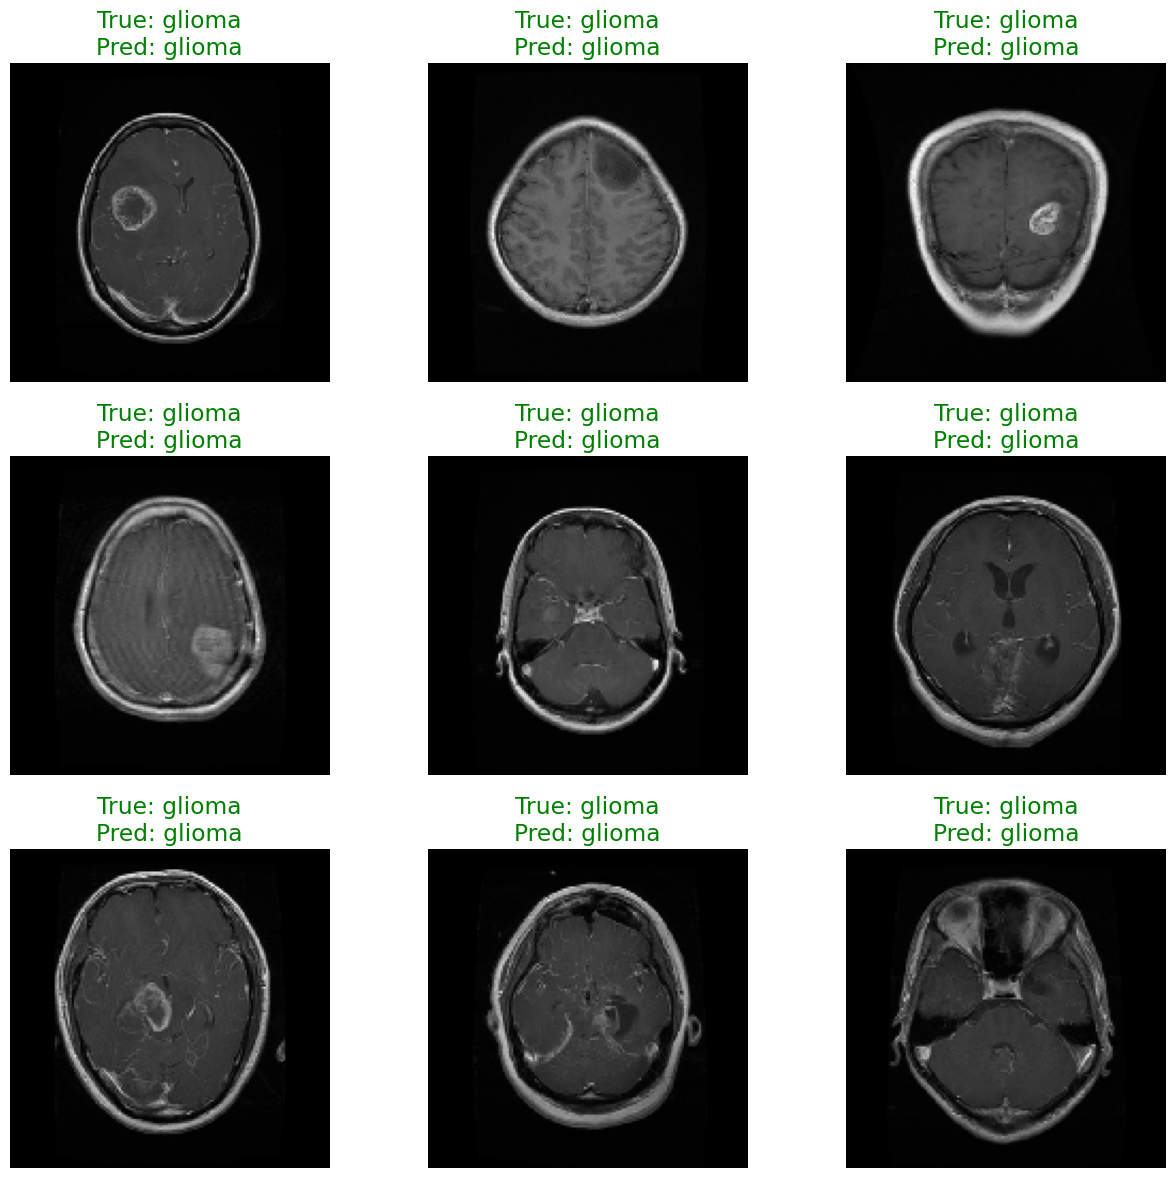

Class name of the first image: glioma
Shape (1, 150, 150, 3)


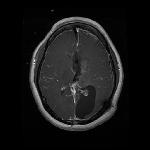

NameError: name 'visualize_misclassified_images' is not defined

In [25]:
# Confusion Matrix
confusion_matrix = CM(CNN_model=model, test_generator=test_generator, categories=class_indices_train_list)

plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(ticks=np.arange(N_TYPES) + 0.5,
           labels=[name.title() for name in class_indices_train_list], ha='center')
plt.yticks(ticks=np.arange(N_TYPES) + 0.5,
           labels=[name.title() for name in class_indices_train_list], va='center')
plt.show()

# Metrics
calculate_metrics(confusion_matrix, categories=class_indices_train_list)

# ✅ Predictions (removed test_dir argument)
plot_sample_predictions(
    model=model,
    test_generator=test_generator,
    categories=class_indices_train_list,
    num_samples=9,
    figsize=(13, 12)
)

# Channel activation maps
batch_images, batch_labels = next(test_generator)
image, label = batch_images[0], batch_labels[0]
image_tensor = np.expand_dims(image, axis=0)

class_indices = test_generator.class_indices
label_name = [k for k, v in class_indices.items() if np.argmax(label) == v][0]

print(f"Class name of the first image: {label_name}")
print(f"Shape {image_tensor.shape}")

# Display the image
display(array_to_img(image_tensor[0]))

# Plot activation maps
visualize_misclassified_images(model, image_tensor, N=8, save=False)


41/41 ━━━━━━━━━━━━━━━━━━━━ 14s 345ms/step


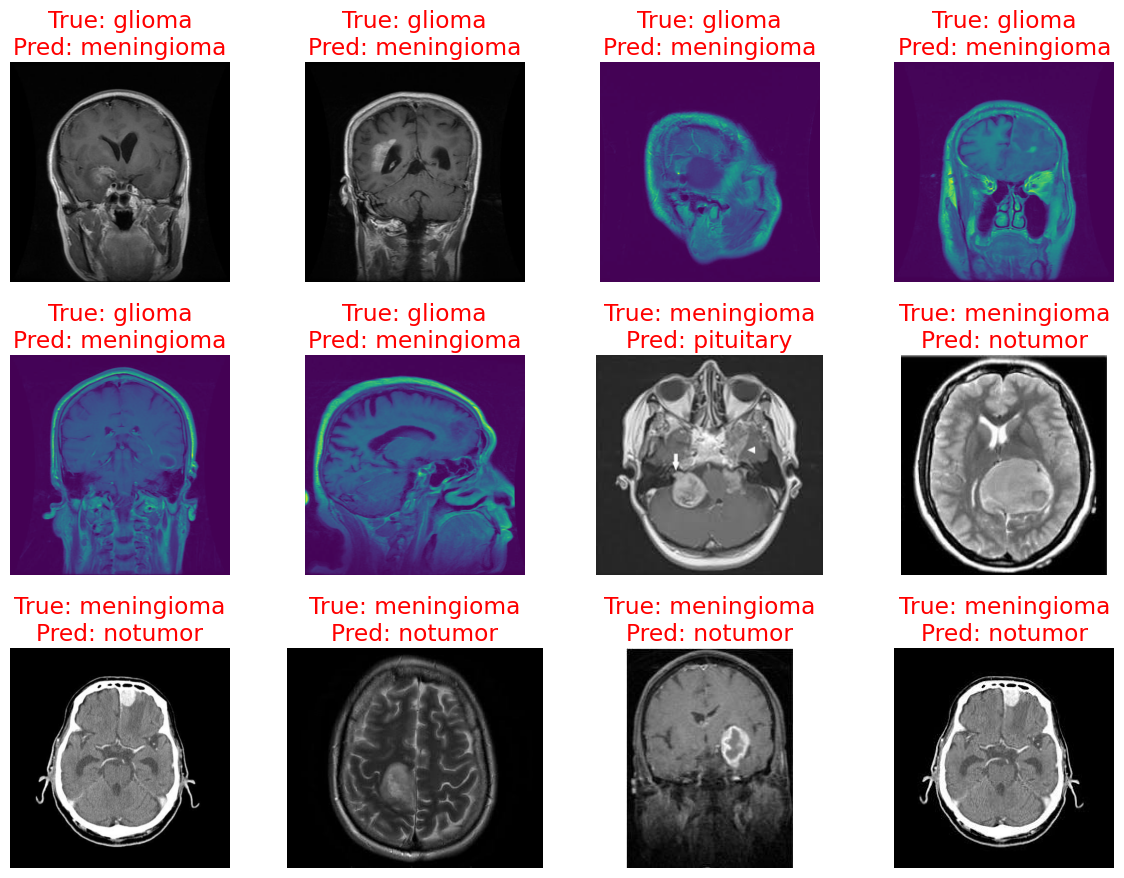

In [26]:
def visualize_misclassified_images(model, test_generator, class_indices, max_images=16):
    """
    Visualize misclassified images from the test set alongside their predicted and true labels.
    """
    from tensorflow.keras.preprocessing.image import array_to_img

    # Reset generator so it starts from beginning
    test_generator.reset()

    misclassified_images = []
    misclassified_labels_true = []
    misclassified_labels_pred = []

    # Predict on entire test set
    predictions = model.predict(test_generator, verbose=1)
    predicted_labels = np.argmax(predictions, axis=1)
    true_labels = test_generator.classes
    class_names = list(class_indices.keys())

    # Identify misclassified indices
    misclassified_indices = np.where(predicted_labels != true_labels)[0]

    for idx in misclassified_indices[:max_images]:
        img = plt.imread(test_generator.filepaths[idx])
        misclassified_images.append(img)
        misclassified_labels_true.append(class_names[true_labels[idx]])
        misclassified_labels_pred.append(class_names[predicted_labels[idx]])

    # Plot misclassified images
    num_misclassified = len(misclassified_images)
    num_rows = int(np.ceil(num_misclassified / 4))
    plt.figure(figsize=(12, 3 * num_rows))

    for i in range(num_misclassified):
        plt.subplot(num_rows, 4, i + 1)
        plt.title(f"True: {misclassified_labels_true[i]}\nPred: {misclassified_labels_pred[i]}", color='red')
        plt.imshow(misclassified_images[i])
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Usage
visualize_misclassified_images(model, test_generator, test_generator.class_indices, max_images=12)


41/41 ━━━━━━━━━━━━━━━━━━━━ 16s 368ms/step


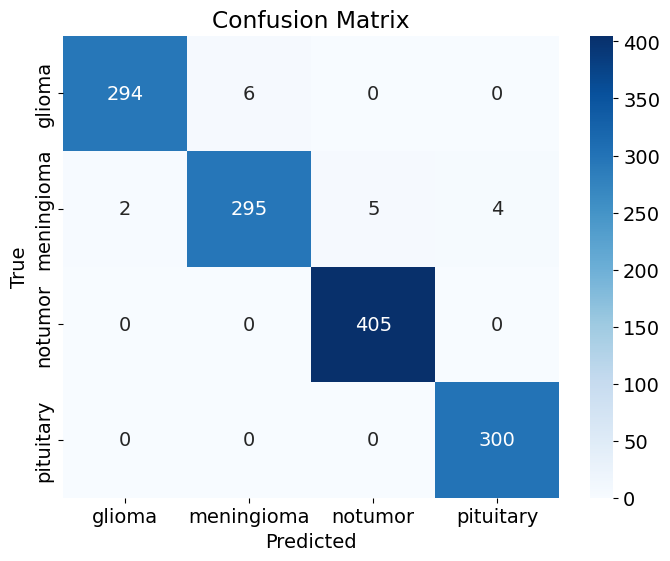

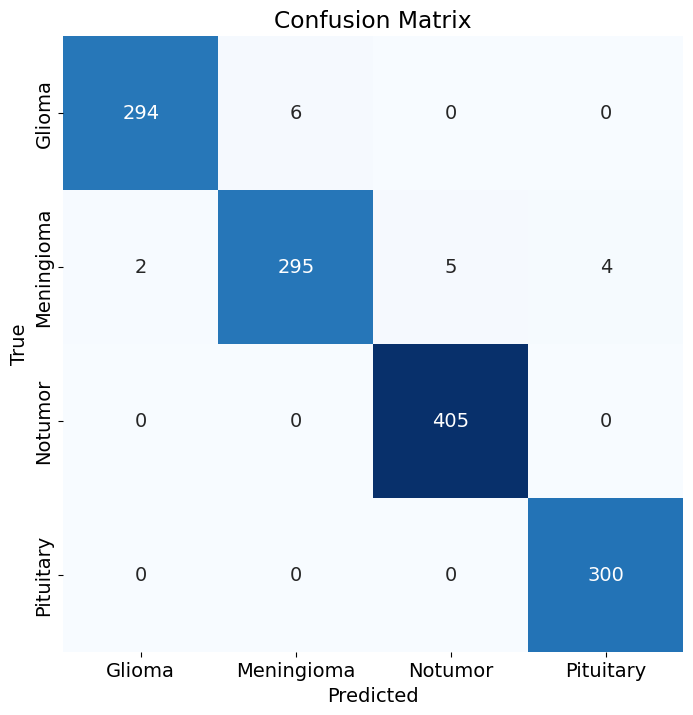

Class: Glioma
Precision: 0.993
Recall: 0.980
F1-Score: 0.987

Class: Meningioma
Precision: 0.980
Recall: 0.964
F1-Score: 0.972

Class: Notumor
Precision: 0.988
Recall: 1.000
F1-Score: 0.994

Class: Pituitary
Precision: 0.987
Recall: 1.000
F1-Score: 0.993


Overall Accuracy: 0.987


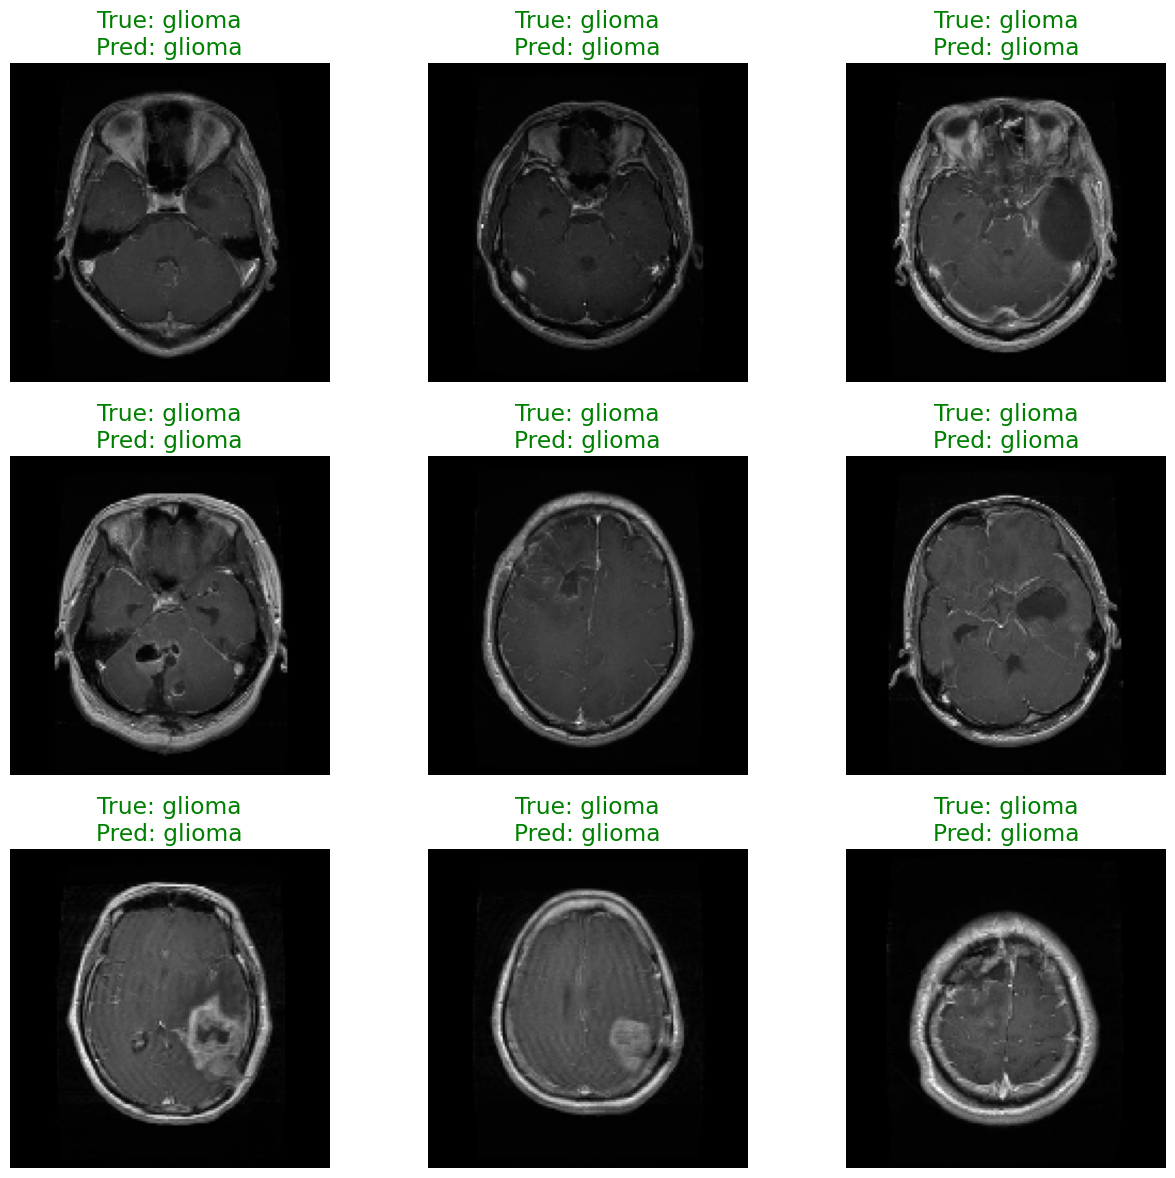

Class name of the first image: glioma
Shape (1, 150, 150, 3)


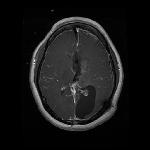

TypeError: visualize_misclassified_images() got an unexpected keyword argument 'N'

In [27]:
# Confusion Matrix
confusion_matrix = CM(CNN_model=model, test_generator=test_generator, categories=class_indices_train_list)

plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(ticks=np.arange(N_TYPES) + 0.5,
           labels=[name.title() for name in class_indices_train_list], ha='center')
plt.yticks(ticks=np.arange(N_TYPES) + 0.5,
           labels=[name.title() for name in class_indices_train_list], va='center')
plt.show()

# Metrics
calculate_metrics(confusion_matrix, categories=class_indices_train_list)

# ✅ Predictions (removed test_dir argument)
plot_sample_predictions(
    model=model,
    test_generator=test_generator,
    categories=class_indices_train_list,
    num_samples=9,
    figsize=(13, 12)
)

# Channel activation maps
batch_images, batch_labels = next(test_generator)
image, label = batch_images[0], batch_labels[0]
image_tensor = np.expand_dims(image, axis=0)

class_indices = test_generator.class_indices
label_name = [k for k, v in class_indices.items() if np.argmax(label) == v][0]

print(f"Class name of the first image: {label_name}")
print(f"Shape {image_tensor.shape}")

# Display the image
display(array_to_img(image_tensor[0]))

# Plot activation maps
visualize_misclassified_images(model, image_tensor, N=8, save=False)

41/41 ━━━━━━━━━━━━━━━━━━━━ 16s 397ms/step


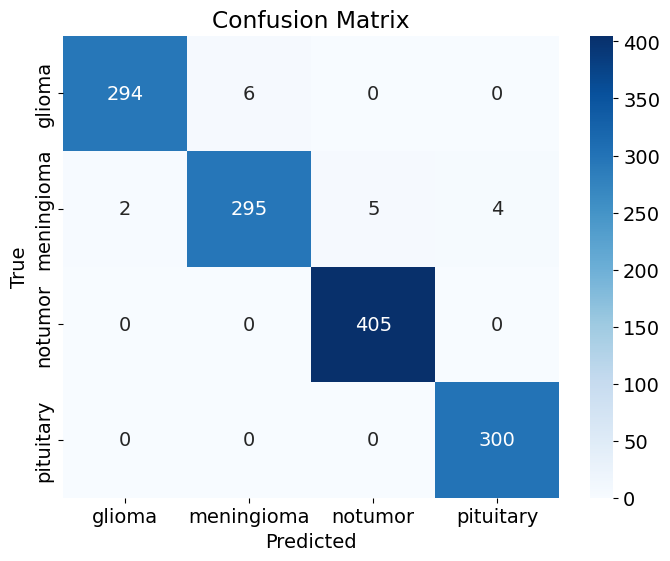

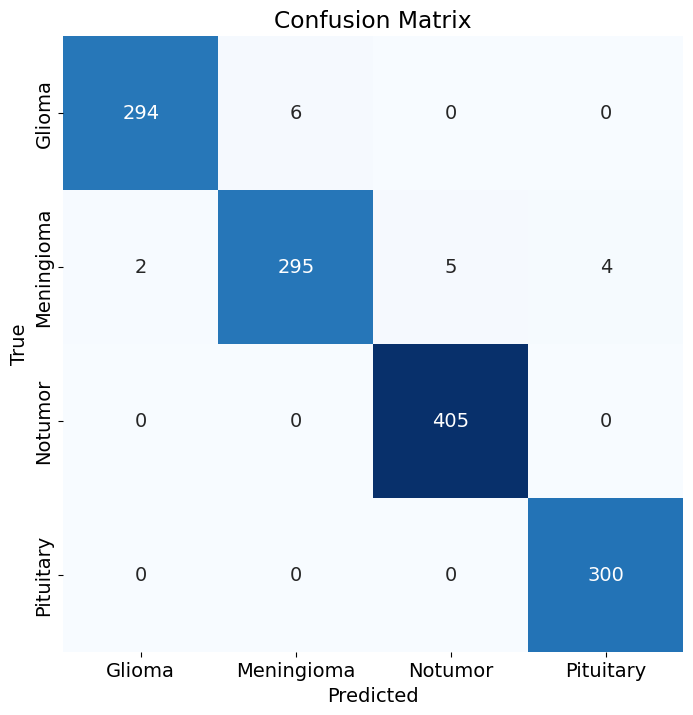

Class: Glioma
Precision: 0.993
Recall: 0.980
F1-Score: 0.987

Class: Meningioma
Precision: 0.980
Recall: 0.964
F1-Score: 0.972

Class: Notumor
Precision: 0.988
Recall: 1.000
F1-Score: 0.994

Class: Pituitary
Precision: 0.987
Recall: 1.000
F1-Score: 0.993


Overall Accuracy: 0.987


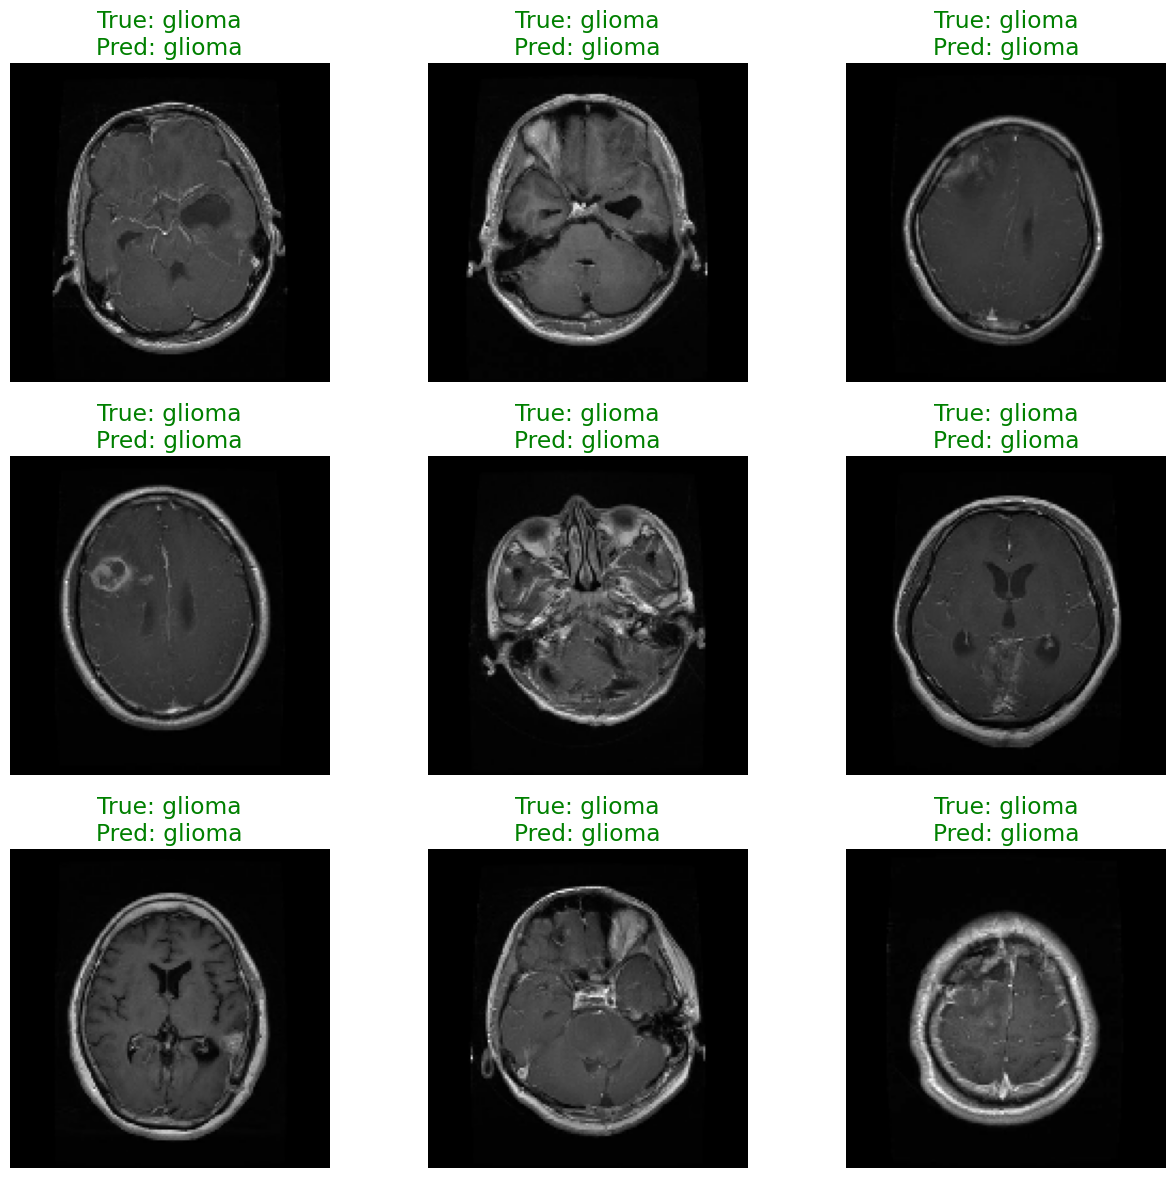

Class name of the first image: glioma
Shape (1, 150, 150, 3)


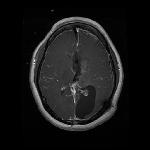

NameError: name 'plot_channel_activation_maps' is not defined

In [28]:
# ✅ Confusion Matrix
confusion_matrix = CM(CNN_model=model, test_generator=test_generator, categories=class_indices_train_list)

plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(ticks=np.arange(N_TYPES) + 0.5,
           labels=[name.title() for name in class_indices_train_list], ha='center')
plt.yticks(ticks=np.arange(N_TYPES) + 0.5,
           labels=[name.title() for name in class_indices_train_list], va='center')
plt.show()

# ✅ Metrics
calculate_metrics(confusion_matrix, categories=class_indices_train_list)

# ✅ Predictions (removed test_dir)
plot_sample_predictions(
    model=model,
    test_generator=test_generator,
    categories=class_indices_train_list,
    num_samples=9,
    figsize=(13, 12)
)

# ✅ Channel activation maps
batch_images, batch_labels = next(test_generator)
image, label = batch_images[0], batch_labels[0]
image_tensor = np.expand_dims(image, axis=0)

class_indices = test_generator.class_indices
label_name = [k for k, v in class_indices.items() if np.argmax(label) == v][0]

print(f"Class name of the first image: {label_name}")
print(f"Shape {image_tensor.shape}")

display(array_to_img(image_tensor[0]))

# Plot activation maps
plot_channel_activation_maps(model, image_tensor, N=8, save=False)

# ✅ Misclassified Images
visualize_misclassified_images(model, test_generator, test_generator.class_indices, max_images=12)


41/41 ━━━━━━━━━━━━━━━━━━━━ 15s 358ms/step


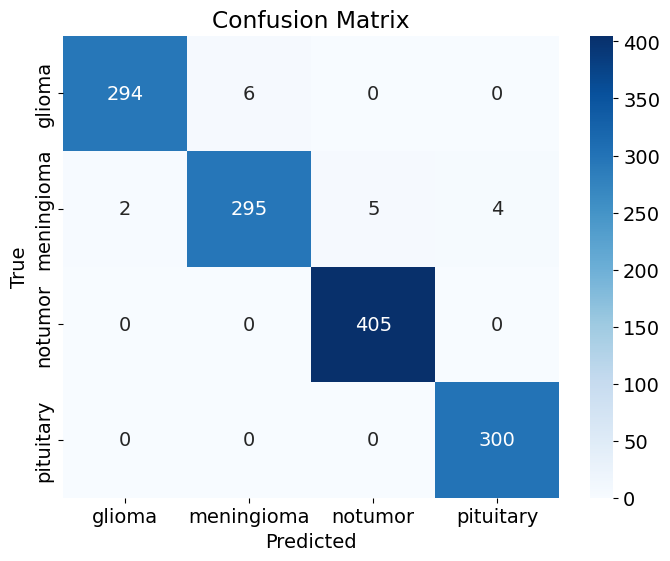

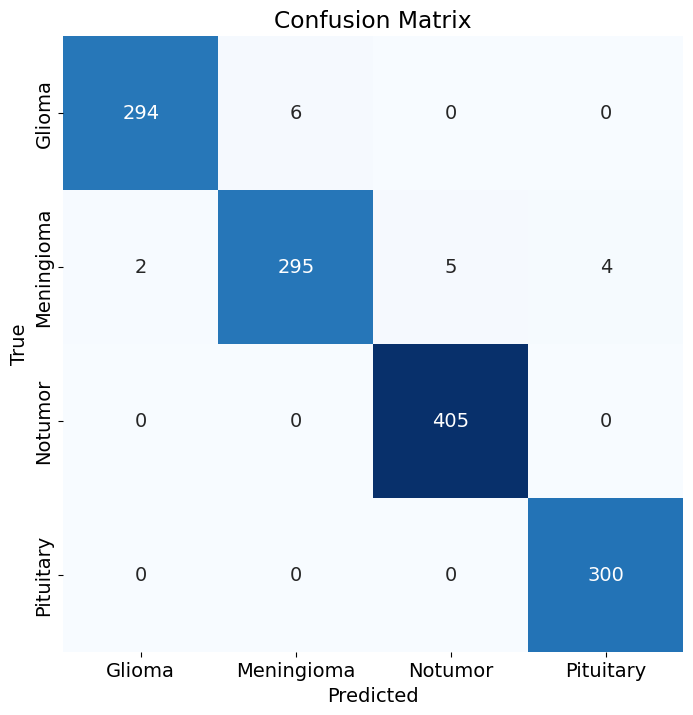

In [29]:
# Plotting confusion matrix
confusion_matrix = CM(CNN_model=model, test_generator=test_generator, categories=class_indices_train_list)

plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(ticks=np.arange(N_TYPES) + 0.5,
           labels=[name.title() for name in class_indices_train_list], ha='center')
plt.yticks(ticks=np.arange(N_TYPES) + 0.5,
           labels=[name.title() for name in class_indices_train_list], va='center')
plt.show()

In [30]:
# Showing metrics
calculate_metrics(confusion_matrix, categories=class_indices_train_list)

Class: Glioma
Precision: 0.993
Recall: 0.980
F1-Score: 0.987

Class: Meningioma
Precision: 0.980
Recall: 0.964
F1-Score: 0.972

Class: Notumor
Precision: 0.988
Recall: 1.000
F1-Score: 0.994

Class: Pituitary
Precision: 0.987
Recall: 1.000
F1-Score: 0.993


Overall Accuracy: 0.987


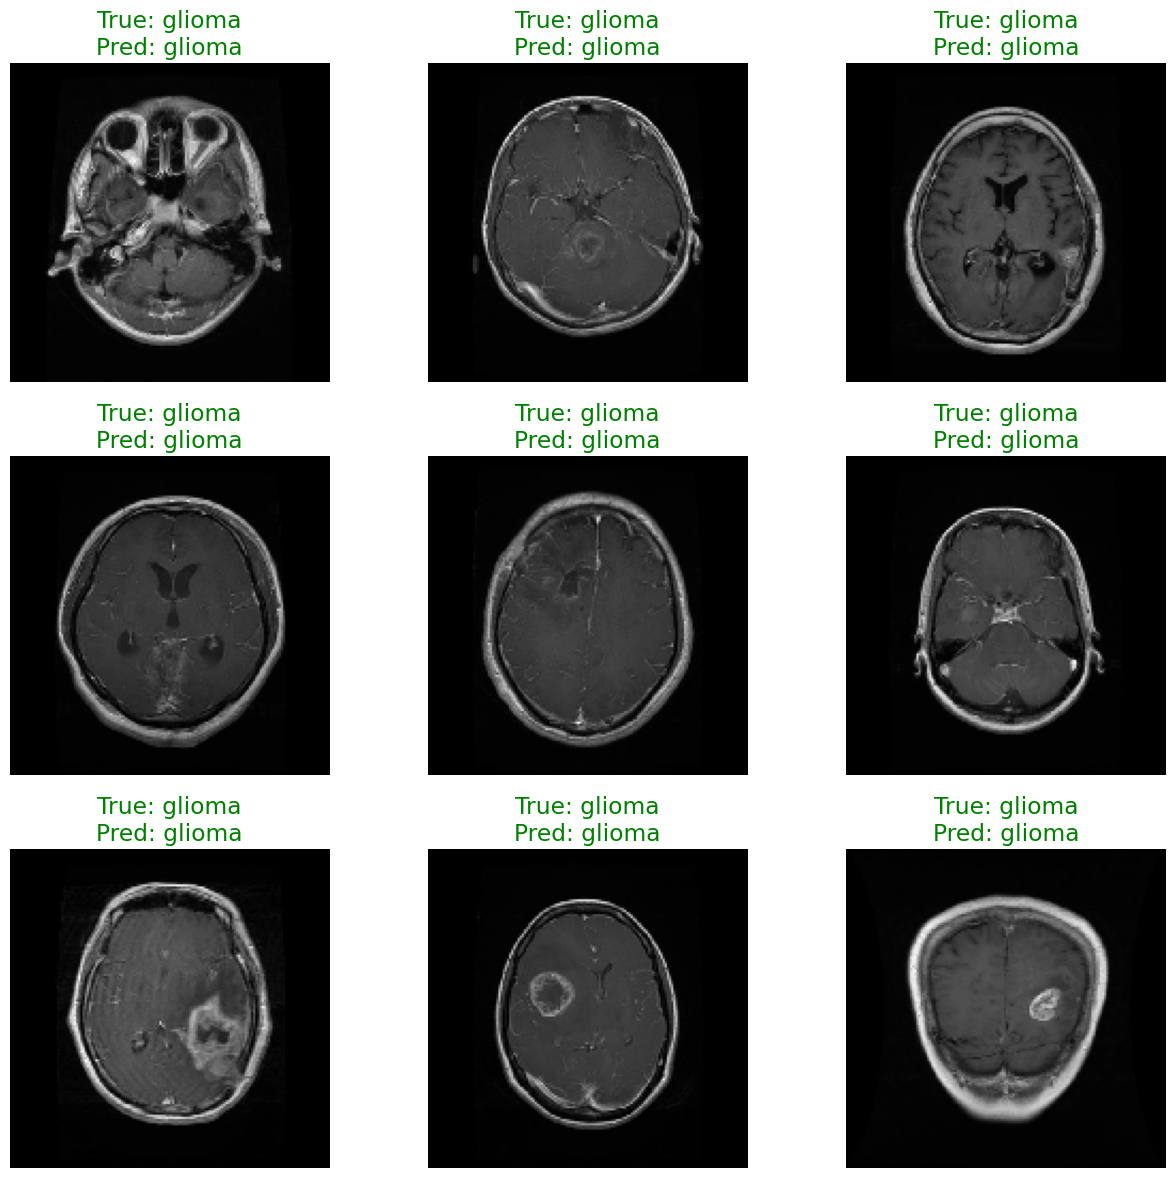

In [32]:
# Using functions in 6.1 for showing results
plot_sample_predictions(model=model,
                        test_generator=test_generator,
                        categories=class_indices_train_list,

                        num_samples=9,
                        figsize=(13, 12))

In [33]:
# channnel map plot
def plot_channel_activation_maps(model, image, images_per_row=16, N=8, save=False):
    """
    Function to visualize how the first N layers of the model observe the input image.

    Parameters:
        model (tensorflow.keras.models.Model): The Keras model for which to visualize the activation maps.
        image (numpy.ndarray): The input image for which to generate activation maps.
        images_per_row (int): Number of activation maps to display per row in the grid.
        N (int): Number of layers to visualize.
        save (bool): If True, save the plots as PDF files.

    Returns:
        None
    """
    from tensorflow.keras.models import Model

    # Create a sub-model that outputs activations for the first N layers
    activation_model = Model(inputs=model.input, outputs=[layer.output for layer in model.layers[:N]])
    activations = activation_model.predict(image)

    # Get the names of the layers for labeling the plots
    layer_names = [layer.name for layer in model.layers[:N]]

    # Visualize the feature maps for each layer
    for layer_name, layer_activation in zip(layer_names, activations):
        # This is the number of features in the feature map
        n_features = layer_activation.shape[-1]
        # The feature map has shape (1, size, size, n_features)
        size = layer_activation.shape[1]
        # We will tile the activation channels in this matrix
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))

        # We'll tile each filter into this big horizontal grid
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0, :, :, col * images_per_row + row]
                # Post-process the feature to make it visually palatable
                channel_image -= channel_image.mean()
                epsilon = 1e-8  # A small epsilon value to avoid division by zero
                channel_std = channel_image.std() + epsilon
                channel_image /= channel_std
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size: (col + 1) * size,
                             row * size: (row + 1) * size] = channel_image

        # Display the grid
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.axis('off')
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

        if save:
            plt.savefig(f'plot_channel_activation_maps_{layer_name}.pdf')

    plt.show()

Class name of the first image: glioma
Shape (1, 150, 150, 3)


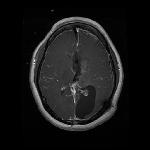

In [34]:
# Get the next batch from the test generator
batch_images, batch_labels = next(test_generator)

# Extract the first image from the batch
image, label = batch_images[0], batch_labels[0]
image_tensor = np.expand_dims(image, axis=0)

# Get the class indices from the test generator
class_indices = test_generator.class_indices

# Convert the one-hot encoded label to the class name
label_name = [k for k, v in class_indices.items() if np.argmax(label) == v][0]

# Display the class name
print(f"Class name of the first image: {label_name}")
print(f'Shape {image_tensor.shape}')
array_to_img(image_tensor[0])

In [35]:
plot_channel_activation_maps(model=model, image=image_tensor, N=5, save=SAVE)

AttributeError: The layer sequential has never been called and thus has no defined input.

41/41 ━━━━━━━━━━━━━━━━━━━━ 17s 373ms/step


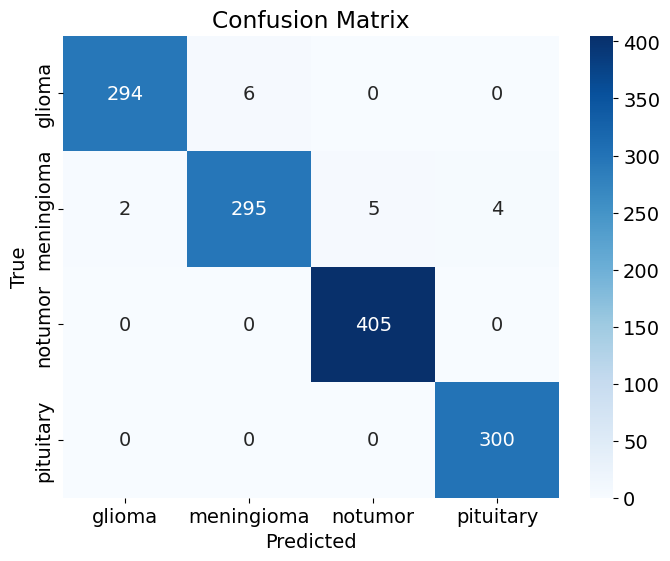

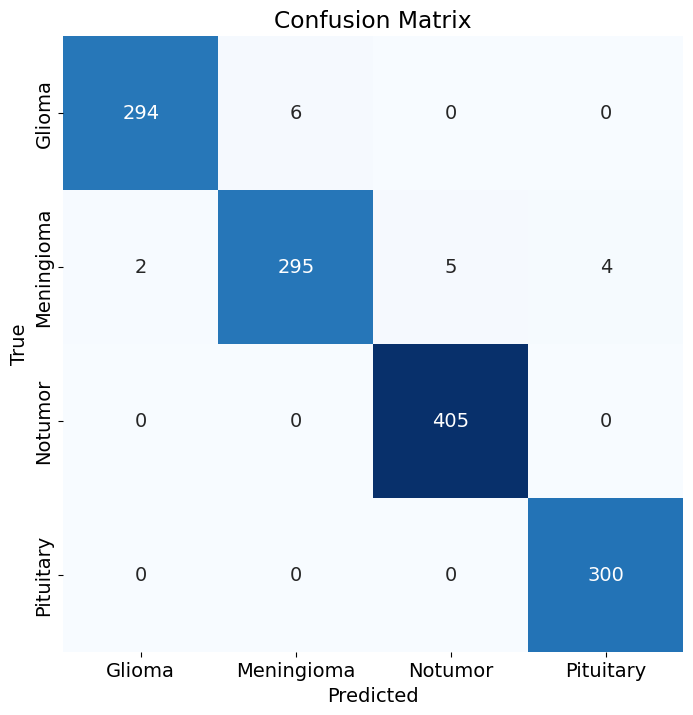

Class: Glioma
Precision: 0.993
Recall: 0.980
F1-Score: 0.987

Class: Meningioma
Precision: 0.980
Recall: 0.964
F1-Score: 0.972

Class: Notumor
Precision: 0.988
Recall: 1.000
F1-Score: 0.994

Class: Pituitary
Precision: 0.987
Recall: 1.000
F1-Score: 0.993


Overall Accuracy: 0.987


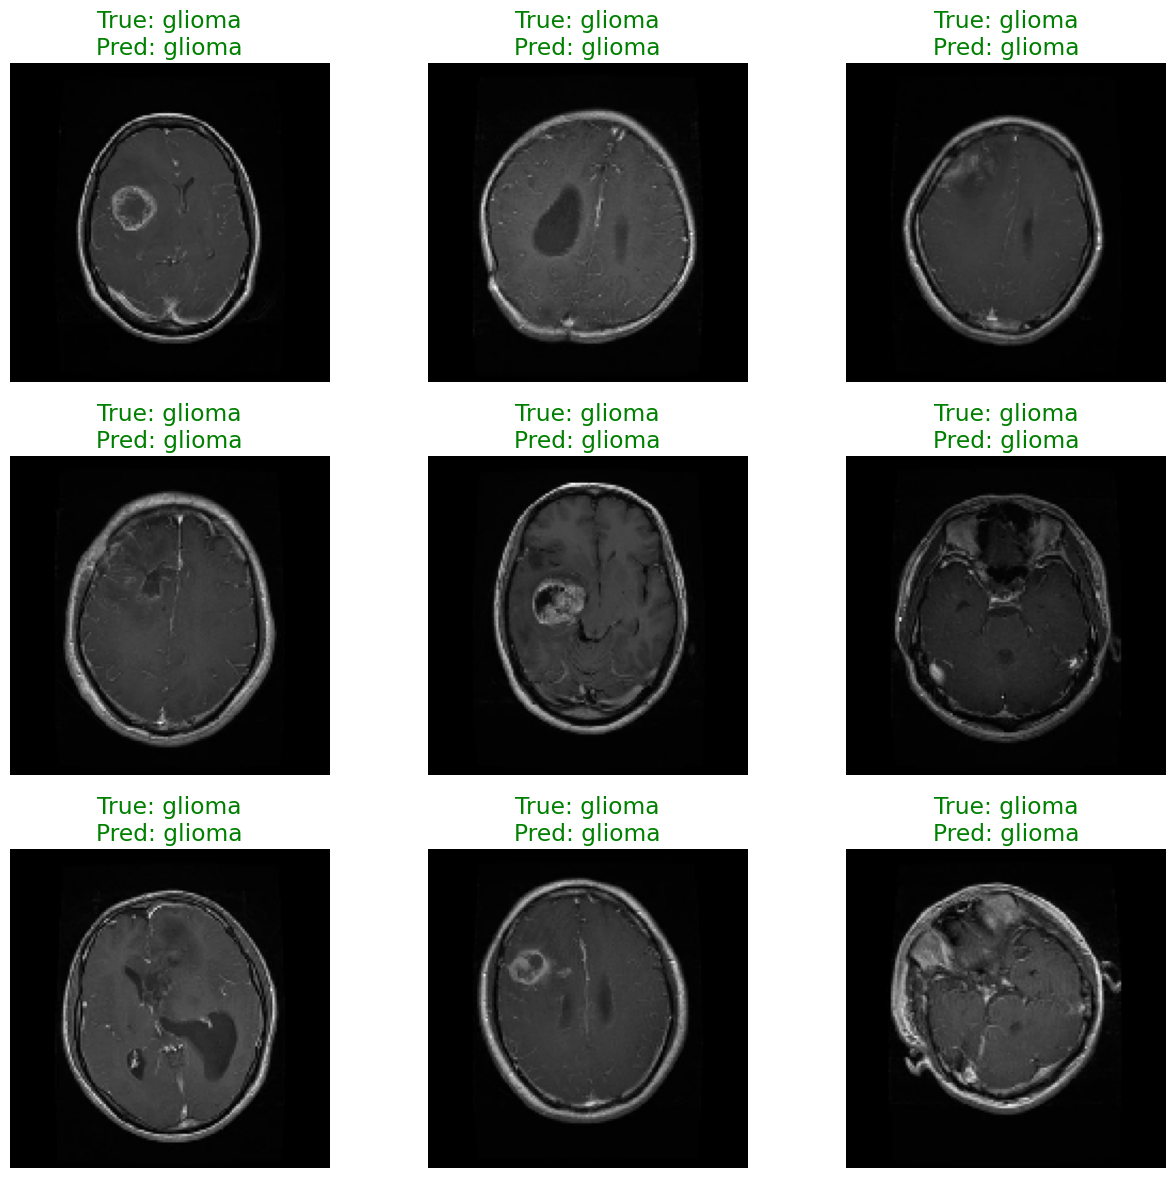

Class name of the first image: glioma
Shape of image tensor: (1, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


AttributeError: The layer sequential has never been called and thus has no defined input.

In [36]:
# ------------------------------
# 1️⃣ Confusion Matrix
# ------------------------------
confusion_matrix = CM(CNN_model=model, test_generator=test_generator, categories=class_indices_train_list)

plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(ticks=np.arange(N_TYPES) + 0.5,
           labels=[name.title() for name in class_indices_train_list], ha='center')
plt.yticks(ticks=np.arange(N_TYPES) + 0.5,
           labels=[name.title() for name in class_indices_train_list], va='center')
plt.show()

# ------------------------------
# 2️⃣ Metrics
# ------------------------------
calculate_metrics(confusion_matrix, categories=class_indices_train_list)

# ------------------------------
# 3️⃣ Sample Predictions
# ------------------------------
plot_sample_predictions(
    model=model,
    test_generator=test_generator,
    categories=class_indices_train_list,
    num_samples=9,
    figsize=(13, 12)
)

# ------------------------------
# 4️⃣ Channel Activation Maps
# ------------------------------
# Get the first batch from the test generator
batch_images, batch_labels = next(test_generator)
image, label = batch_images[0], batch_labels[0]
image_tensor = np.expand_dims(image, axis=0)

# Convert one-hot label to class name
class_indices = test_generator.class_indices
label_name = [k for k, v in class_indices.items() if np.argmax(label) == v][0]
print(f"Class name of the first image: {label_name}")
print(f"Shape of image tensor: {image_tensor.shape}")

# Ensure model is "called" on input to define layers
_ = model.predict(image_tensor)

# Plot channel activation maps for the first 5 layers
plot_channel_activation_maps(model=model, image=image_tensor, N=5, save=False)

# ------------------------------
# 5️⃣ Misclassified Images
# ------------------------------
visualize_misclassified_images(
    model=model,
    test_generator=test_generator,
    class_indices=test_generator.class_indices,
    max_images=12
)


In [37]:
# Save the trained model as a single .h5 file
model.save("brain_tumor_model.h5")
print("Model saved as brain_tumor_model.h5")


Model saved as brain_tumor_model.h5


In [38]:
from google.colab import files

# Download the .h5 model
files.download("brain_tumor_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
# Showing metrics
calculate_metrics(confusion_matrix, categories=class_indices_train_list)

NameError: name 'calculate_metrics' is not defined